In [37]:
import pandas as pd
from helper import get_my_dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Data Understanding

## Initial Data exploration

### Instances and attributes

In [38]:
"""
Get the data_set filtered for my borough
"""
main_df = get_my_dataset()

In [39]:
"""
Checking the rows and columns of the dataset
"""
main_df.shape

(2070, 32)

### Data types

In [40]:
main_df.dtypes

Accident_Index                                  object
Location_Easting_OSGR                            int64
Location_Northing_OSGR                           int64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_District                         int64
Local_Authority_Highway                         object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                      int64
Junction_D

## Data quality issues

### Missing values

Missing Values Per Column:
Accident_Index                                   0
Location_Easting_OSGR                            0
Location_Northing_OSGR                           0
Longitude                                        0
Latitude                                         0
Police_Force                                     0
Accident_Severity                                0
Number_of_Vehicles                               0
Number_of_Casualties                             0
Date                                             0
Day_of_Week                                      0
Time                                             0
Local_Authority_District                         0
Local_Authority_Highway                          0
1st_Road_Class                                   0
1st_Road_Number                                  0
Road_Type                                        0
Speed_limit                                      0
Junction_Detail                                  0
Junc

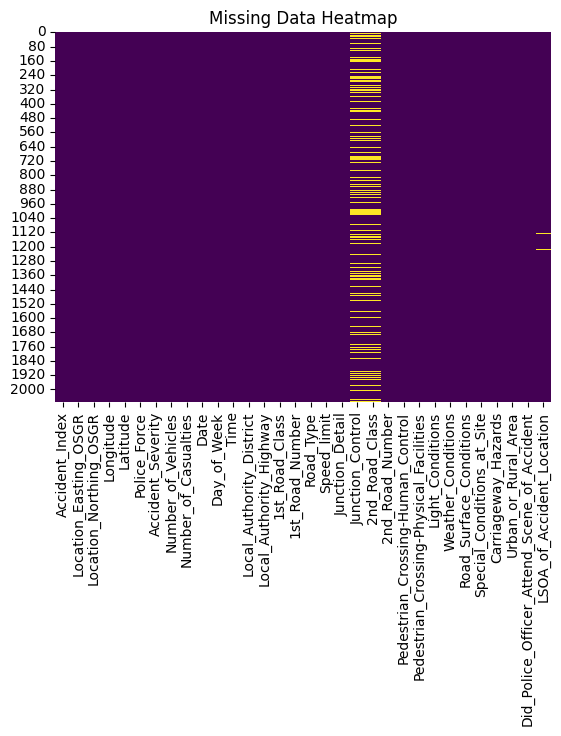

In [41]:
""" 
Checking missing values
"""
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define a list of missing value indicators (e.g., -1)
missing_indicators = [-1, "-1", ""]

# Check for missing values using `isnull()` and placeholders
missing_values = main_df.isnull().sum()
for col in main_df.columns:
    missing_values[col] += (main_df[col].isin(missing_indicators)).sum()

print("Missing Values Per Column:")
print(missing_values)

# Visualize missing data using a heatmap
sns.heatmap(main_df.isin(missing_indicators) | main_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

### Outliers

Visualize to see distribution

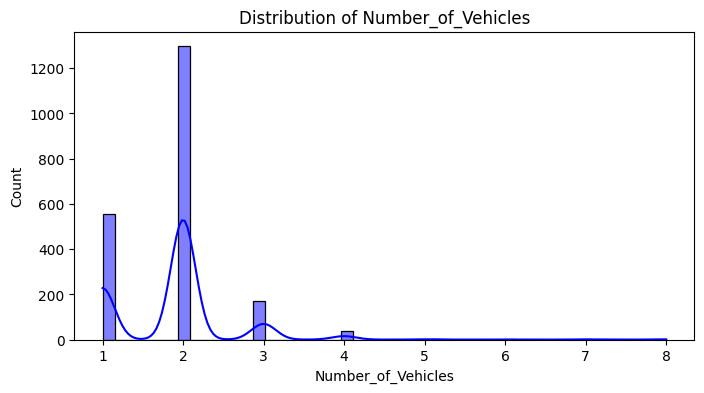

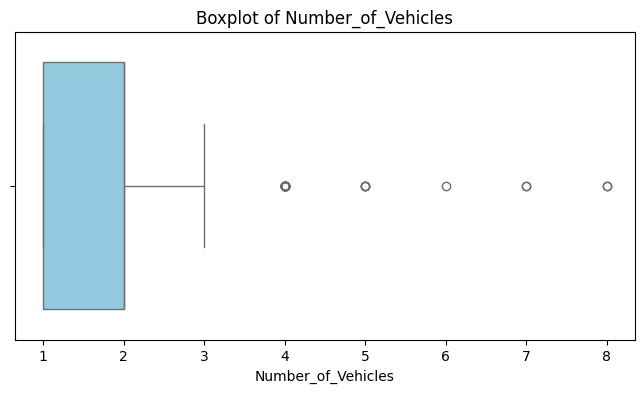

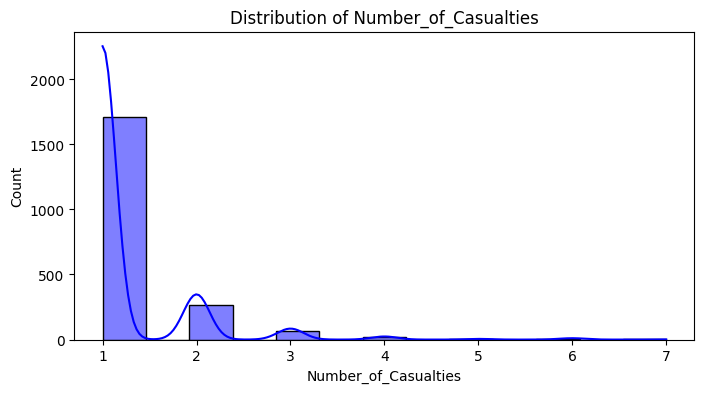

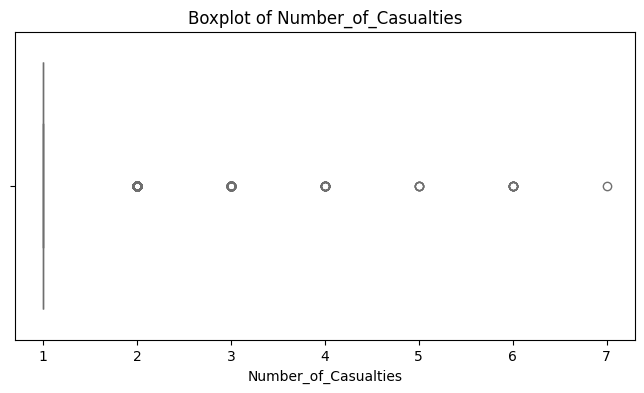

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_columns = [
    'Number_of_Vehicles', 'Number_of_Casualties'
]

# Plot histograms and boxplots
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(main_df[column], kde=True, color='blue')
    plt.title(f'Distribution of {column}')
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.boxplot(main_df[column], orient='h', color='skyblue')
    plt.title(f'Boxplot of {column}')
    plt.show()


Detect Outliers

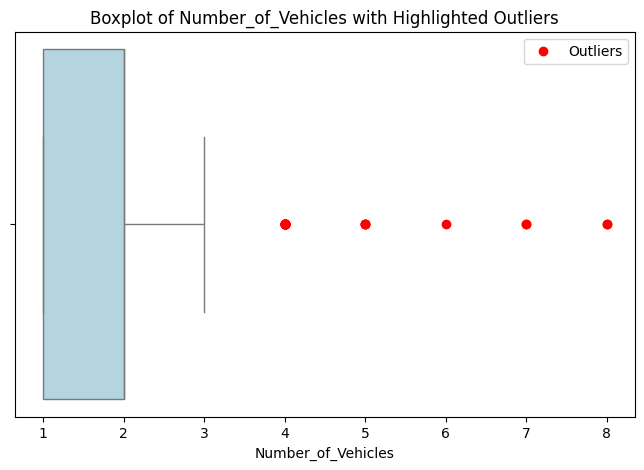

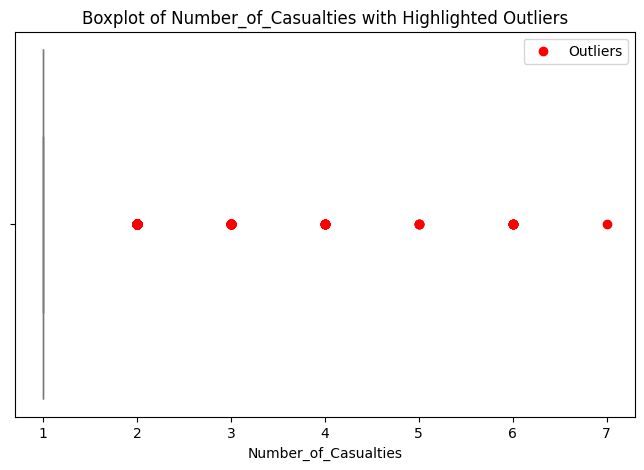

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot each numerical column with its outliers
for column in numerical_columns:
    Q1 = main_df[column].quantile(0.25)
    Q3 = main_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = main_df[(main_df[column] < lower_bound) | (main_df[column] > upper_bound)]

    # Boxplot with highlighted outliers
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=main_df[column], color='lightblue', showfliers=False)  # Remove default outliers
    plt.scatter(outliers[column], [0] * len(outliers), color='red', label='Outliers')  # Highlight outliers
    plt.title(f'Boxplot of {column} with Highlighted Outliers')
    plt.xlabel(column)
    plt.legend()
    plt.show()


### Extreme values

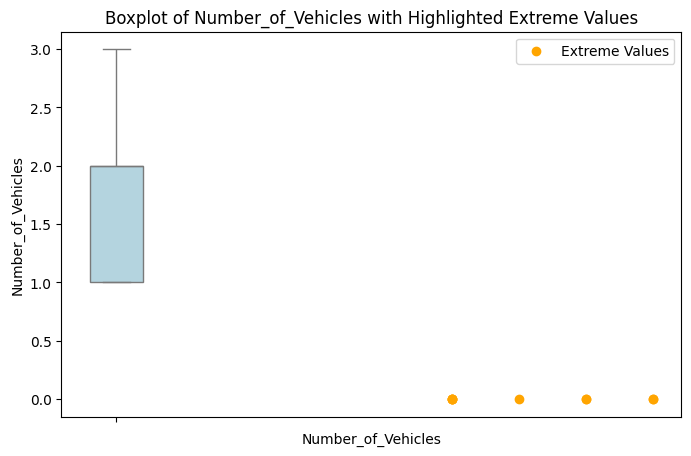

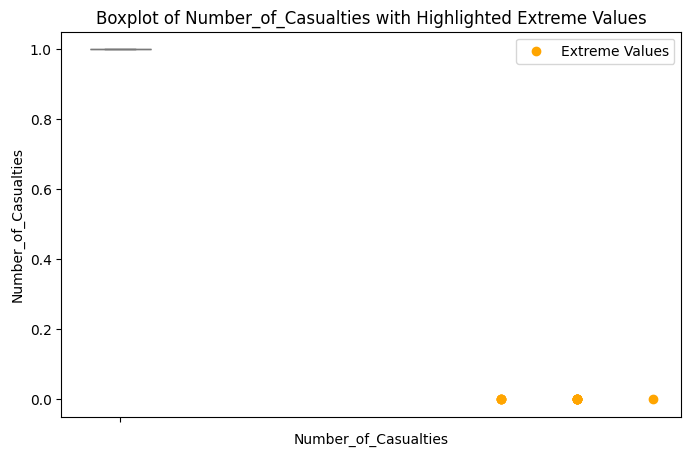

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot boxplots with extreme values highlighted
def plot_extreme_values(df, numerical_columns):
    for column in numerical_columns:
        # Calculate extreme value thresholds (1st and 99th percentiles)
        low_percentile = df[column].quantile(0.01)
        high_percentile = df[column].quantile(0.99)
        
        # Identify extreme values
        extreme_values = df[(df[column] < low_percentile) | (df[column] > high_percentile)]
        
        # Create a boxplot
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df[column], color='lightblue', showfliers=False)  # Boxplot without default outliers
        plt.scatter(extreme_values[column], [0] * len(extreme_values), color='orange', label='Extreme Values')  # Highlight extreme values
        plt.title(f'Boxplot of {column} with Highlighted Extreme Values')
        plt.xlabel(column)
        plt.legend()
        plt.show()

# Specify the numerical columns to plot
numerical_columns = ['Number_of_Vehicles', 'Number_of_Casualties']

# Call the function
plot_extreme_values(main_df, numerical_columns)


### Incomparable value ranges

Value Ranges for Numerical Columns:
Number_of_Vehicles: Min = 1, Max = 8, Range = 7
Number_of_Casualties: Min = 1, Max = 7, Range = 6


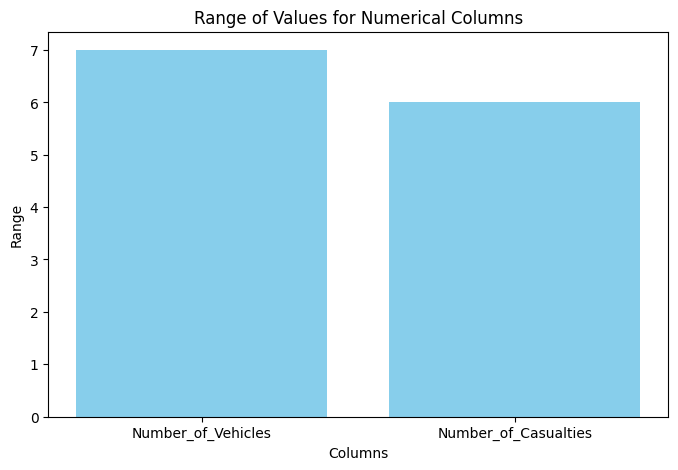

In [45]:
# Define the numerical columns (excluding Speed_limit)
numerical_columns = ['Number_of_Vehicles', 'Number_of_Casualties']

# Print the min, max, and range for each numerical column
print("Value Ranges for Numerical Columns:")
for column in numerical_columns:
    min_val = main_df[column].min()
    max_val = main_df[column].max()
    range_val = max_val - min_val
    print(f"{column}: Min = {min_val}, Max = {max_val}, Range = {range_val}")

import matplotlib.pyplot as plt

# Calculate ranges for numerical columns
ranges = {column: main_df[column].max() - main_df[column].min() for column in numerical_columns}

# Plot the ranges
plt.figure(figsize=(8, 5))
plt.bar(ranges.keys(), ranges.values(), color='skyblue')
plt.title('Range of Values for Numerical Columns')
plt.ylabel('Range')
plt.xlabel('Columns')
plt.show()



### Imbalanced classes

In [46]:
# List of categorical columns
categorical_columns = [
    "Police_Force",
    "Accident_Severity",
    "Number_of_Vehicles",
    "Number_of_Casualties",
    "Day_of_Week",
    "Local_Authority_District",
    "Local_Authority_Highway",
    "1st_Road_Class",
    "1st_Road_Number",
    "Road_Type",
    "Speed_limit",
    "Junction_Detail",
    "Junction_Control",
    "2nd_Road_Class",
    "2nd_Road_Number",
    "Pedestrian_Crossing-Human_Control",
    "Pedestrian_Crossing-Physical_Facilities",
    "Light_Conditions",
    "Weather_Conditions",
    "Road_Surface_Conditions",
    "Special_Conditions_at_Site",
    "Carriageway_Hazards",
    "Urban_or_Rural_Area",
    "Did_Police_Officer_Attend_Scene_of_Accident",
]


# Check class distributions
print("Class Distributions for Categorical Columns:")
for column in categorical_columns:
    print(f"\n{column} Distribution:")
    print(main_df[column].value_counts())


Class Distributions for Categorical Columns:

Police_Force Distribution:
Police_Force
1    2070
Name: count, dtype: int64

Accident_Severity Distribution:
Accident_Severity
3    1745
2     310
1      15
Name: count, dtype: int64

Number_of_Vehicles Distribution:
Number_of_Vehicles
2    1297
1     557
3     170
4      37
5       4
7       2
8       2
6       1
Name: count, dtype: int64

Number_of_Casualties Distribution:
Number_of_Casualties
1    1711
2     264
3      64
4      18
6       8
5       4
7       1
Name: count, dtype: int64

Day_of_Week Distribution:
Day_of_Week
6    336
4    335
5    327
2    318
3    310
7    252
1    192
Name: count, dtype: int64

Local_Authority_District Distribution:
Local_Authority_District
23    2070
Name: count, dtype: int64

Local_Authority_Highway Distribution:
Local_Authority_Highway
E09000021    2070
Name: count, dtype: int64

1st_Road_Class Distribution:
1st_Road_Class
3    1388
6     301
5     235
4     146
Name: count, dtype: int64

1st_Road_N

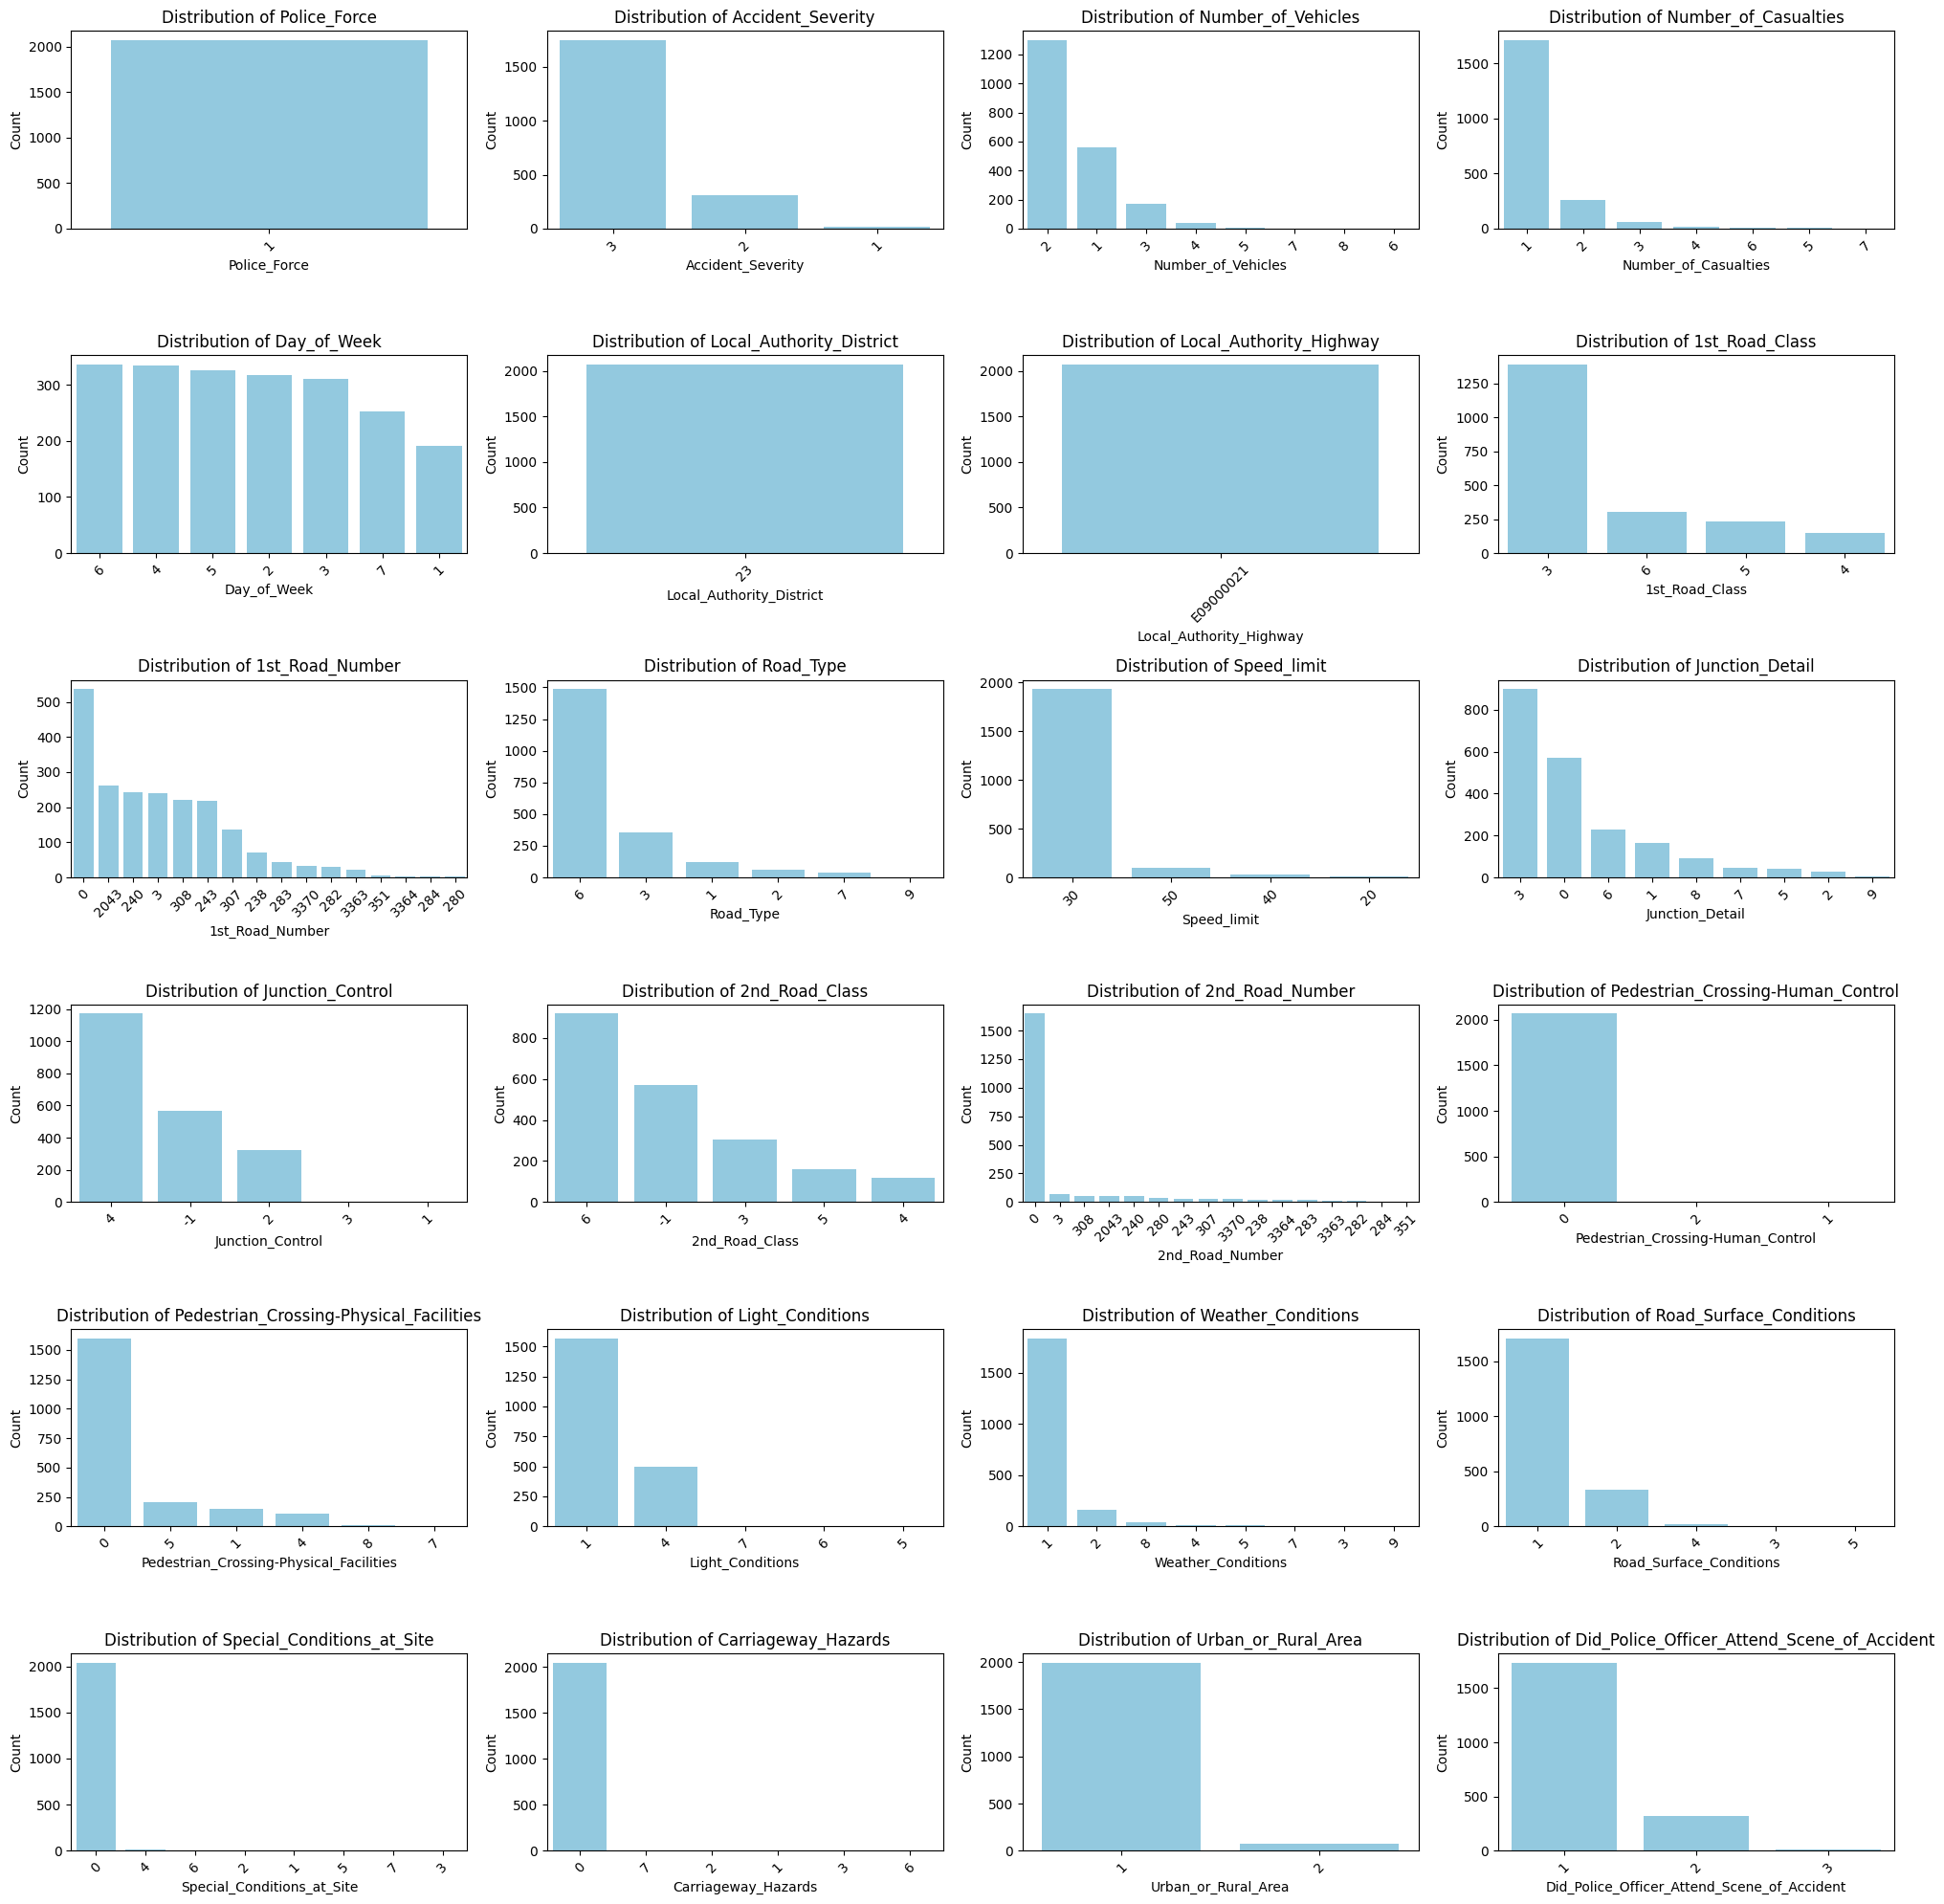

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    sns.countplot(
        data=main_df,
        x=column,
        order=main_df[column].value_counts().index,
        color='skyblue',
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Mapped version

In [48]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Read the field metadata Excel file (all sheets as a dictionary of DataFrames)
# field_metadata = pd.read_excel("field_metadata.xls", sheet_name=None)

# # Function to map encoded values to labels
# def replace_codes_with_labels(data, metadata_dict, categorical_columns):
#     for column in categorical_columns:
#         if column in metadata_dict:  # Check if column has a corresponding sheet
#             mapping_df = metadata_dict[column]  # Sheet data for current column
#             code_to_label = dict(zip(mapping_df['code'], mapping_df['label']))
#             data[column] = data[column].replace(code_to_label)  # Replace values
#     return data

# # Replace codes with labels
# mapped_df = replace_codes_with_labels(main_df, field_metadata, categorical_columns)

# # Plot updated distributions
# fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 20))
# axes = axes.flatten()

# for i, column in enumerate(categorical_columns):
#     sns.countplot(
#         data=mapped_df,
#         x=column,
#         order=mapped_df[column].value_counts().index,
#         color='skyblue',
#         ax=axes[i]
#     )
#     axes[i].set_title(f'Distribution of {column}')
#     axes[i].set_xlabel(column)
#     axes[i].set_ylabel('Count')
#     axes[i].tick_params(axis='x', rotation=45)

# plt.tight_layout()
# plt.show()


### Correct data types

In [49]:
# Convert date and time columns to datetime
main_df['Date'] = pd.to_datetime(main_df['Date'], format='%d/%m/%Y', errors='coerce')
main_df['Time'] = pd.to_datetime(main_df['Time'], format='%H:%M', errors='coerce')
# Lists of columns to convert to specific data types
category_columns = [
    'Police_Force', 'Accident_Severity', 'Day_of_Week', 'Speed_limit', 'Weather_Conditions',
    'Road_Type', 'Light_Conditions', 'Urban_or_Rural_Area', '1st_Road_Class', '1st_Road_Number',
    '2nd_Road_Class', '2nd_Road_Number', 'Local_Authority_Highway', 'Junction_Detail',
    'Junction_Control', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities',
    'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards',
    'Did_Police_Officer_Attend_Scene_of_Accident', 'Local_Authority_District'
]

int_columns = ['Number_of_Vehicles', 'Number_of_Casualties']

# Convert columns to 'category' dtype
for col in category_columns:
    main_df[col] = main_df[col].astype('category')

# Convert columns to 'int' dtype
for col in int_columns:
    main_df[col] = main_df[col].astype(int)

main_df.dtypes

Accident_Index                                         object
Location_Easting_OSGR                                   int64
Location_Northing_OSGR                                  int64
Longitude                                             float64
Latitude                                              float64
Police_Force                                         category
Accident_Severity                                    category
Number_of_Vehicles                                      int64
Number_of_Casualties                                    int64
Date                                           datetime64[ns]
Day_of_Week                                          category
Time                                           datetime64[ns]
Local_Authority_District                             category
Local_Authority_Highway                              category
1st_Road_Class                                       category
1st_Road_Number                                      category
Road_Typ

### Basic statistics of each attribute

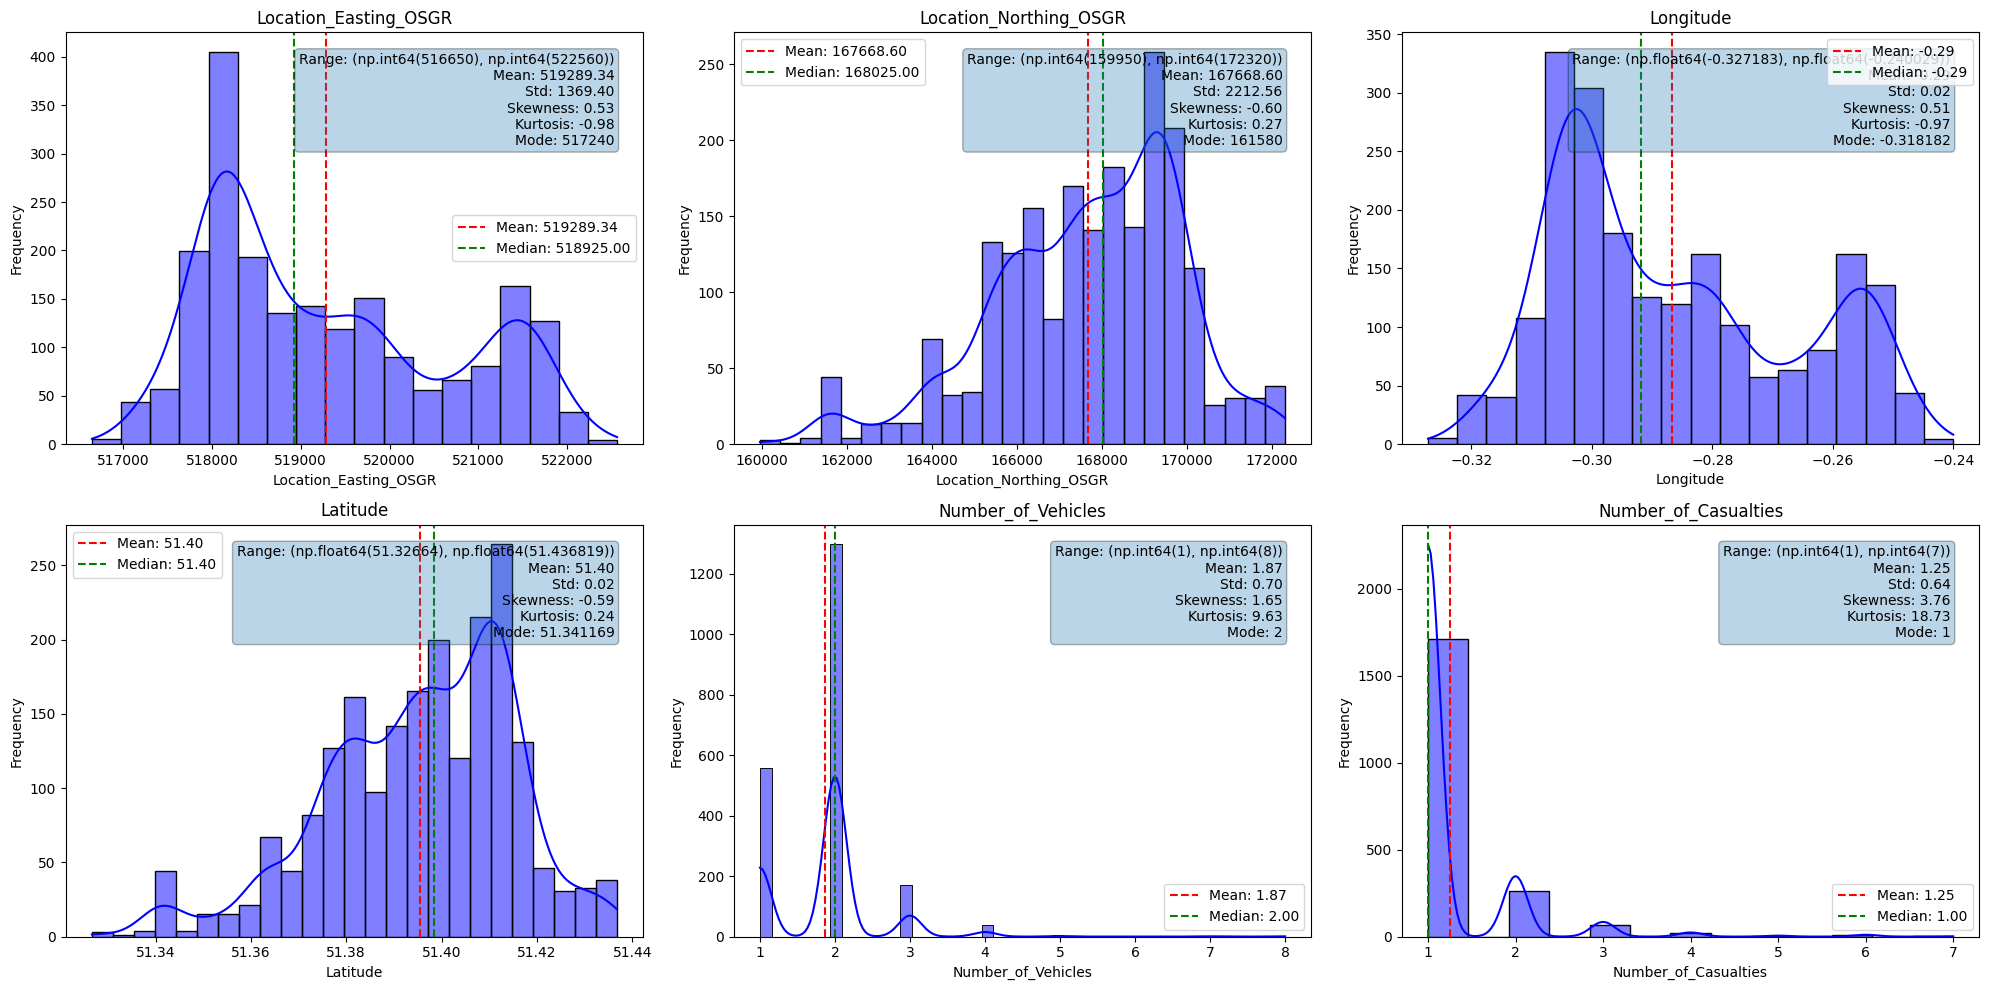

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import skew, kurtosis

# Define columns
numerical_columns = ['Location_Easting_OSGR', 'Location_Northing_OSGR', 
                     'Longitude', 'Latitude', 
                     'Number_of_Vehicles', 'Number_of_Casualties']

categorical_columns = [
        'Police_Force', 'Accident_Severity', 'Day_of_Week', 'Speed_limit', 'Weather_Conditions',
    'Road_Type', 'Light_Conditions', 'Urban_or_Rural_Area', '1st_Road_Class', '1st_Road_Number',
    '2nd_Road_Class', '2nd_Road_Number', 'Local_Authority_Highway', 'Junction_Detail',
    'Junction_Control', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities',
    'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards',
    'Did_Police_Officer_Attend_Scene_of_Accident', 'Local_Authority_District','LSOA_of_Accident_Location','Accident_Index'
                       ]

# all_columns = numerical_columns + categorical_columns
all_columns = numerical_columns

# Determine grid size for subplots
num_cols = 3  # Number of columns in the grid
num_rows = math.ceil(len(all_columns) / num_cols)

# Create figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()

# Plot each attribute
for i, column in enumerate(all_columns):
    if column in numerical_columns:
        # Numerical column: Histogram with all statistics annotated
        data = main_df[column]
        mean = data.mean()
        median = data.median()
        std = data.std()
        skewness = skew(data, nan_policy='omit')
        kurt = kurtosis(data, nan_policy='omit')
        mode = data.mode()[0]
        value_range = (data.min(), data.max())

        sns.histplot(data=data, kde=True, ax=axes[i], color='blue')
        axes[i].axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
        axes[i].axvline(median, color='green', linestyle='--', label=f'Median: {median:.2f}')
        axes[i].set_title(f'{column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
        # Annotate statistics
        stats_text = (f"Range: {value_range}\nMean: {mean:.2f}\nStd: {std:.2f}\n"
                      f"Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}\nMode: {mode}")
        axes[i].text(0.95, 0.95, stats_text, transform=axes[i].transAxes, fontsize=10,
                     verticalalignment='top', horizontalalignment='right',
                     bbox=dict(boxstyle="round", alpha=0.3))
        axes[i].legend()

    elif column in categorical_columns:
        # Categorical column: Bar plot with counts annotated
        sns.countplot(data=main_df, x=column, ax=axes[i], color='skyblue', 
                      order=main_df[column].value_counts().index)
        axes[i].set_title(f'{column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Count')

        # Add counts above bars
        for p in axes[i].patches:
            axes[i].annotate(f'{int(p.get_height())}', 
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                             textcoords='offset points')
        axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(len(all_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and save the figure
plt.tight_layout()
plt.show()


Categorical columns

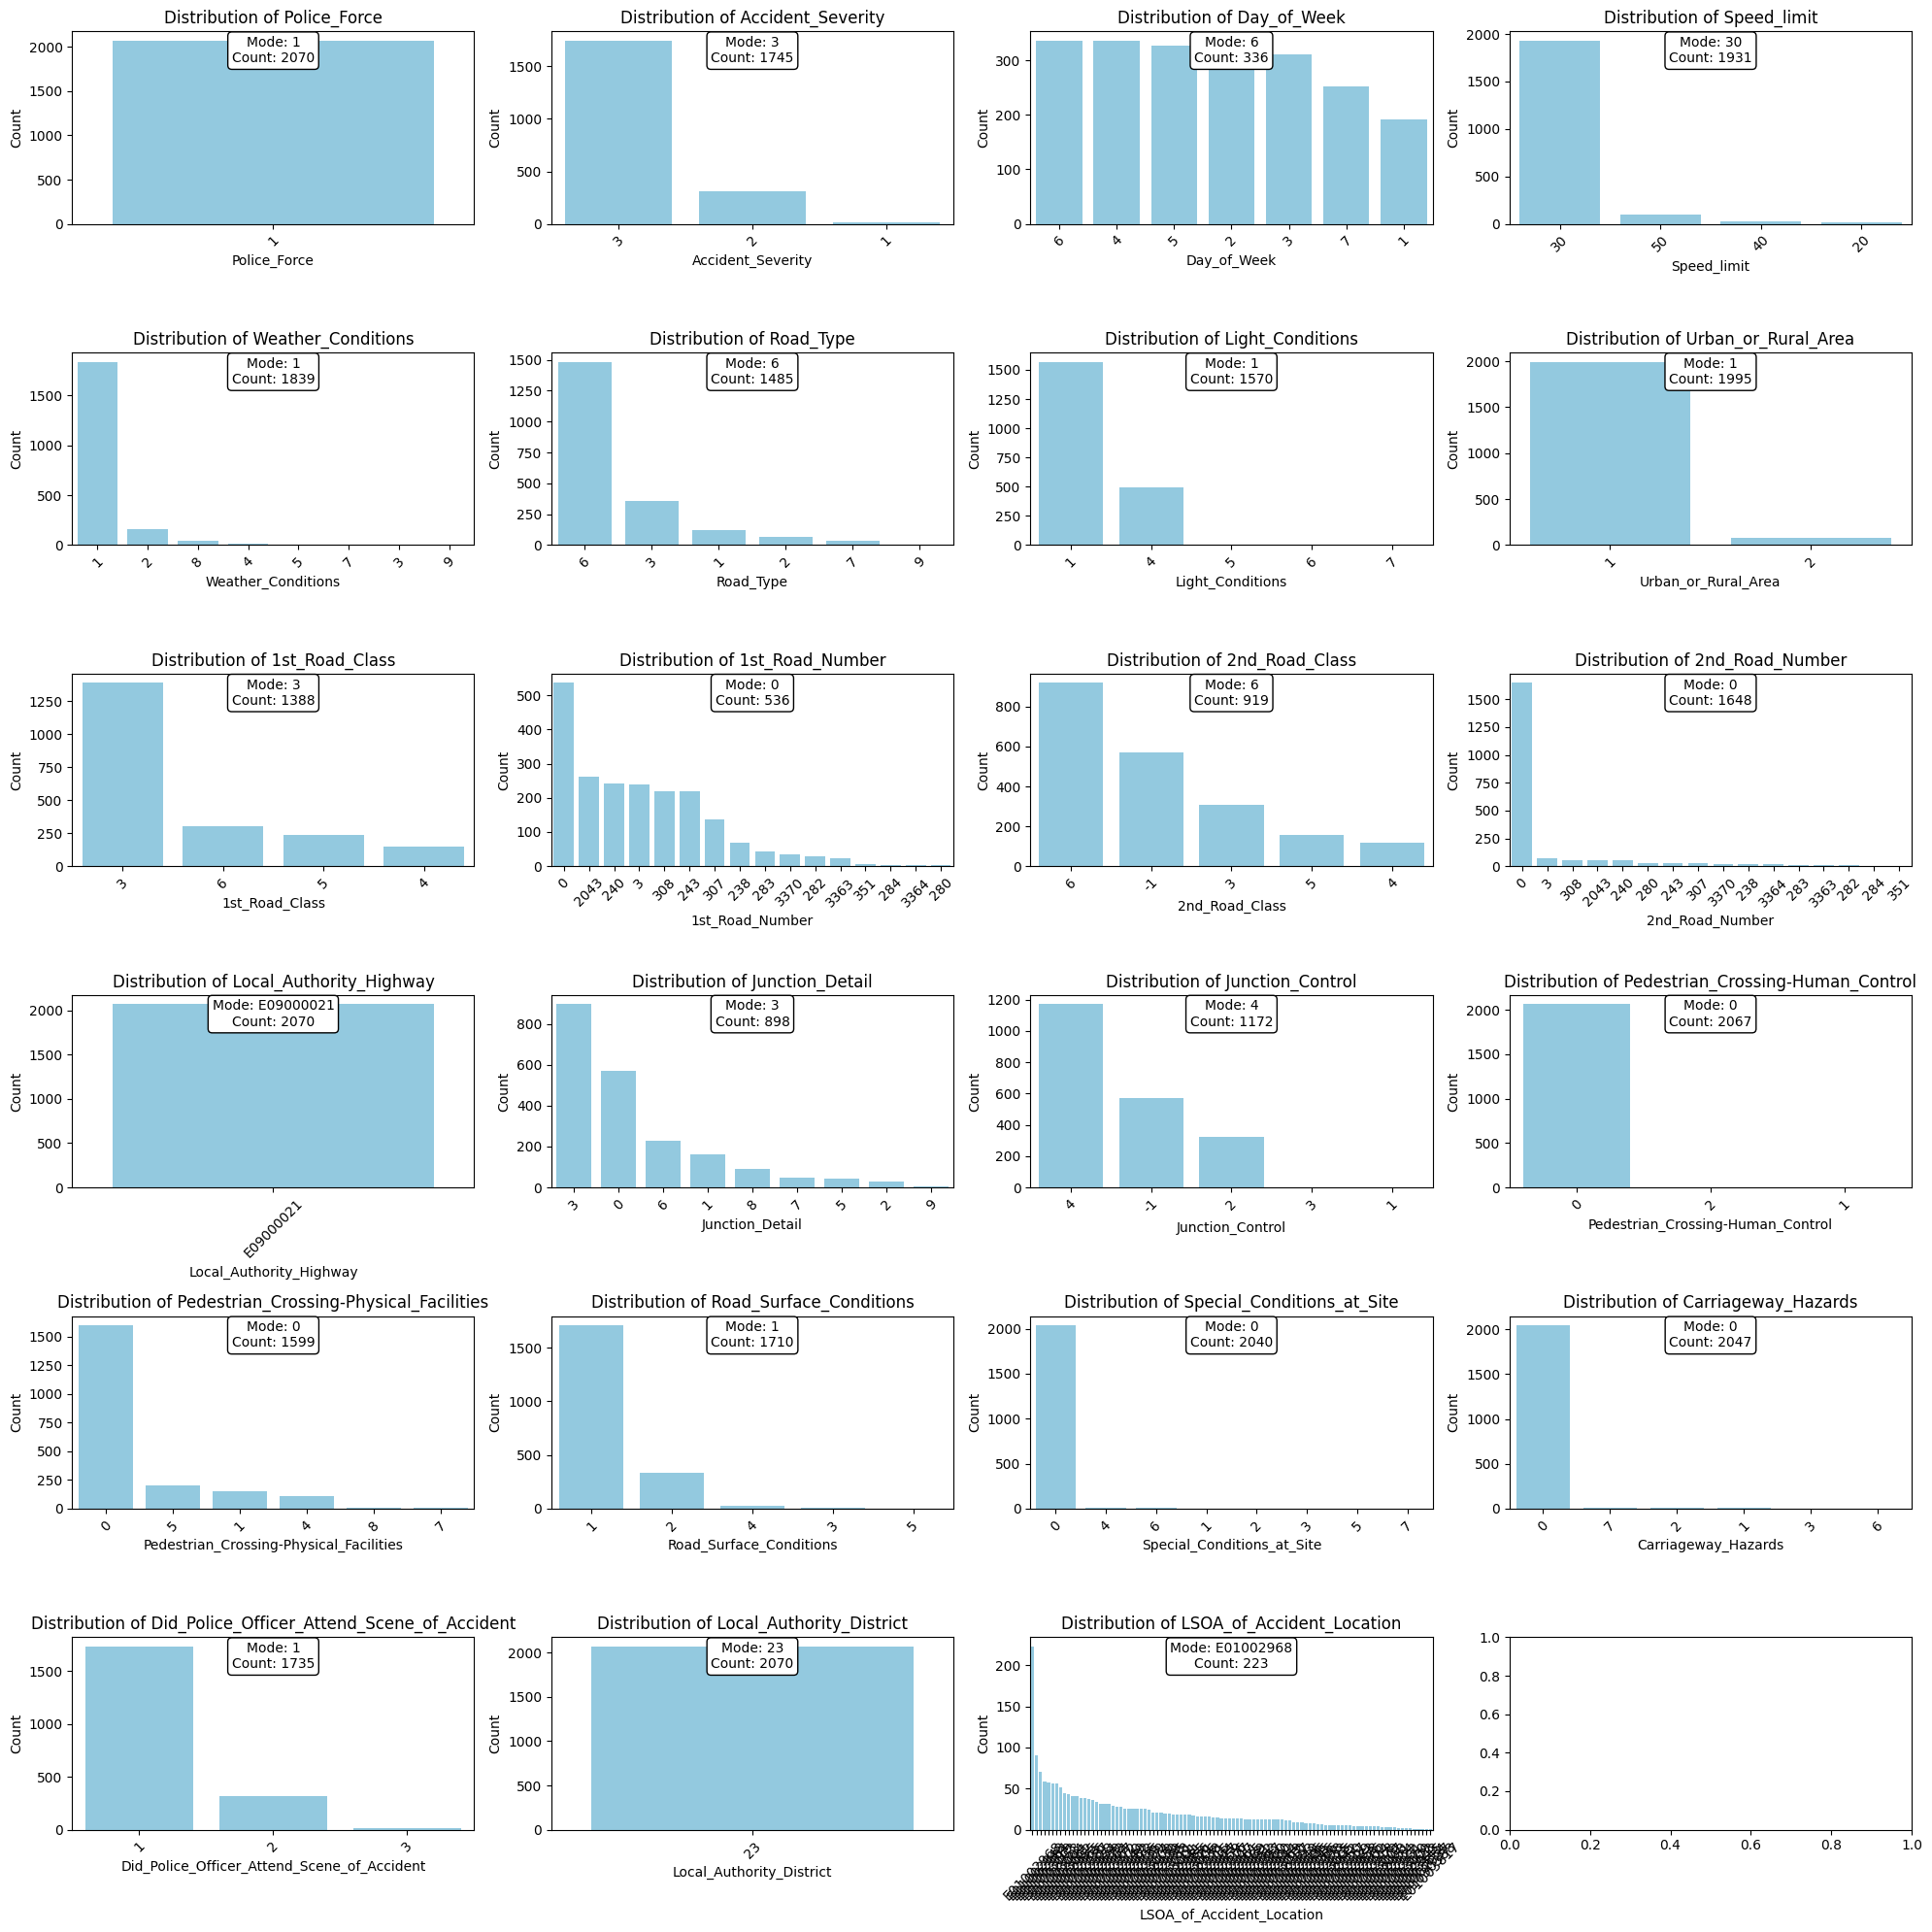

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    sns.countplot(
        data=main_df,
        x=column,
        order=main_df[column].value_counts().index,
        color='skyblue',
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

    # Annotate each plot with the mode of the categorical column
    mode = main_df[column].mode()[0]
    count = main_df[column].value_counts()[mode]
    axes[i].annotate(f'Mode: {mode}\nCount: {count}', 
                     xy=(0.5, 0.9), xycoords='axes fraction', 
                     ha='center', va='center', fontsize=10, 
                     bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

plt.tight_layout()
plt.show()

## Data preparation

### Pre processing

Missing values

Updated Missing Values Per Column:
Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_District                       0
Local_Authority_Highway                        0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                  

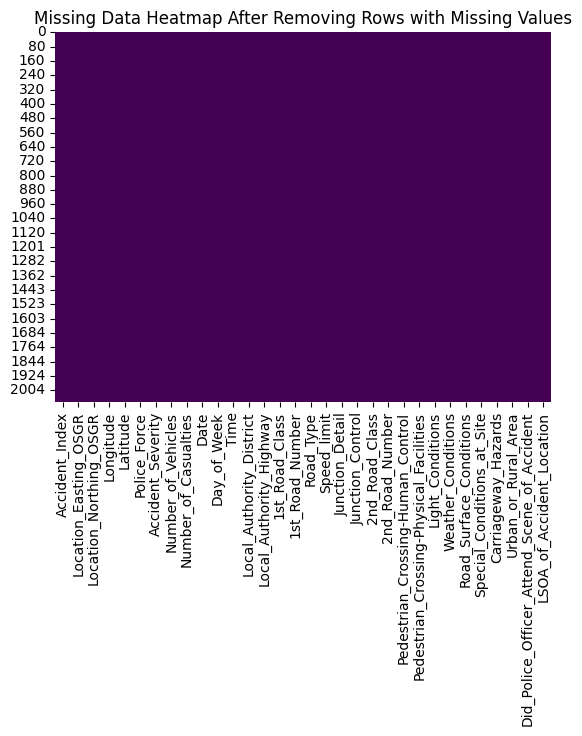

In [52]:
# Remove rows with missing values
main_df.dropna(inplace=True)

# Verify no missing values remain
updated_missing_values = main_df.isnull().sum()
print("Updated Missing Values Per Column:")
print(updated_missing_values)

# Visualize remaining missing data to ensure no missing values
sns.heatmap(main_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap After Removing Rows with Missing Values")
plt.show()


Imbalanced classes

In [53]:
imbalanced_classes = {}

for column in categorical_columns:
    class_counts = main_df[column].value_counts(normalize=True) * 100
    if class_counts.max() > 90:  # Threshold for imbalance (e.g., one class >90%)
        imbalanced_classes[column] = class_counts

from imblearn.over_sampling import RandomOverSampler

# Oversample the target variable
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(main_df.drop('Accident_Severity', axis=1),
                                                     main_df['Accident_Severity'])

# Combine resampled data
balanced_df = X_resampled.copy()
balanced_df['Accident_Severity'] = y_resampled

print(balanced_df['Accident_Severity'].value_counts())

Accident_Severity
1    1741
2    1741
3    1741
Name: count, dtype: int64


/Users/christopherjude/CJ/Codespace/school/data-mining/.venv/lib/python3.10/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/Users/christopherjude/CJ/Codespace/school/data-mining/.venv/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Outliers

Shape after outlier removal: (1687, 32)


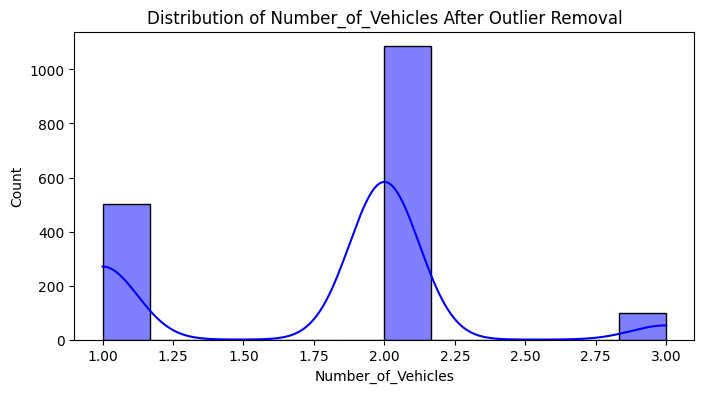

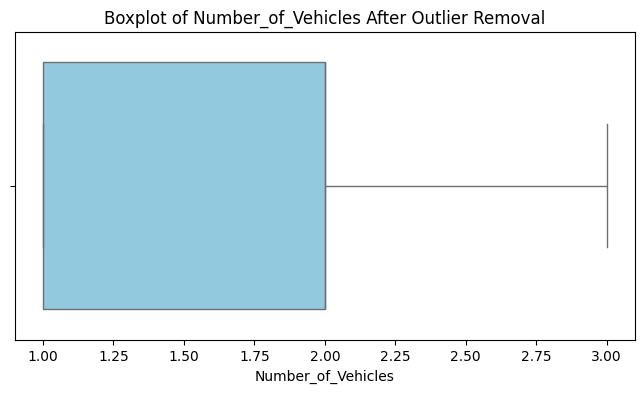

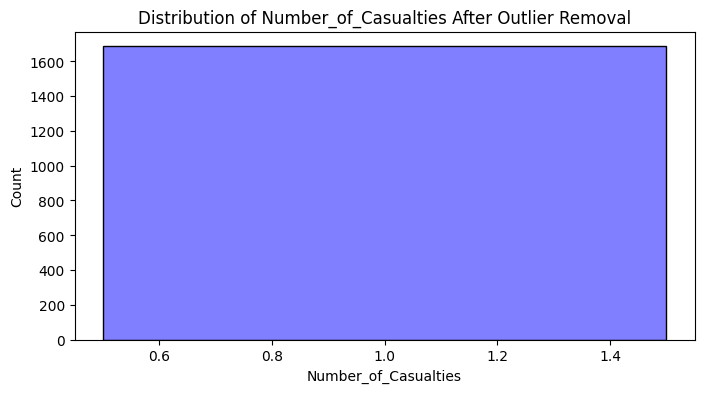

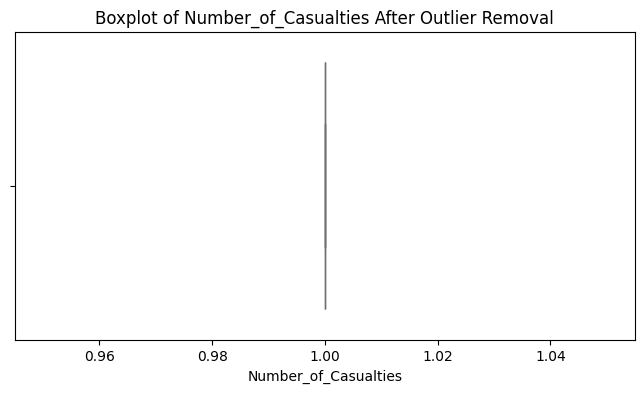

In [54]:
numerical_columns = ['Number_of_Vehicles', 'Number_of_Casualties']

for column in numerical_columns:
    # Calculate the Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = main_df[column].quantile(0.25)
    Q3 = main_df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove rows where the value is outside the bounds
    main_df = main_df[(main_df[column] >= lower_bound) & (main_df[column] <= upper_bound)]

# Display the new shape of the dataset after outlier removal
print("Shape after outlier removal:", main_df.shape)

import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns

# Re-visualize histograms and boxplots after removing outliers
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(main_df[column], kde=True, color='blue')
    plt.title(f'Distribution of {column} After Outlier Removal')
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.boxplot(main_df[column], orient='h', color='skyblue')
    plt.title(f'Boxplot of {column} After Outlier Removal')
    plt.show()



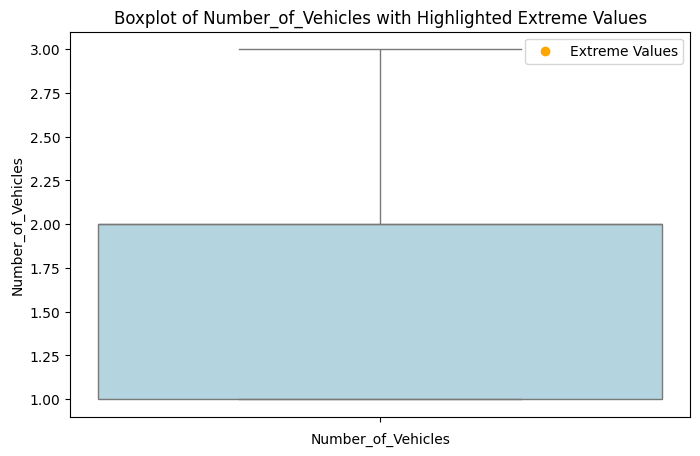

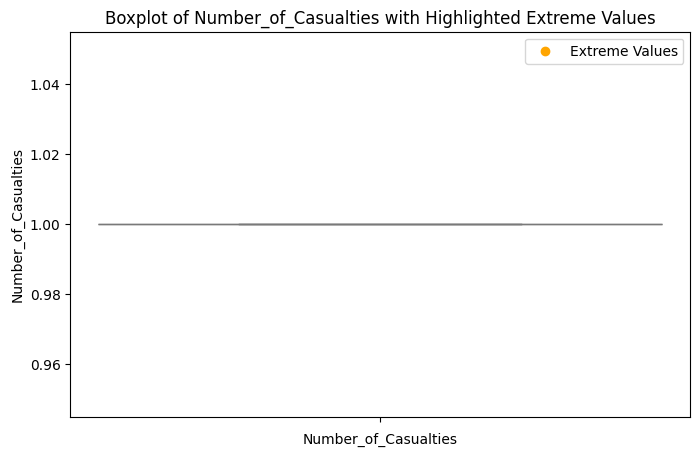

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot boxplots with extreme values highlighted
def plot_extreme_values(df, numerical_columns):
    for column in numerical_columns:
        # Calculate extreme value thresholds (1st and 99th percentiles)
        low_percentile = df[column].quantile(0.01)
        high_percentile = df[column].quantile(0.99)
        
        # Identify extreme values
        extreme_values = df[(df[column] < low_percentile) | (df[column] > high_percentile)]
        
        # Create a boxplot
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df[column], color='lightblue', showfliers=False)  # Boxplot without default outliers
        plt.scatter(extreme_values[column], [0] * len(extreme_values), color='orange', label='Extreme Values')  # Highlight extreme values
        plt.title(f'Boxplot of {column} with Highlighted Extreme Values')
        plt.xlabel(column)
        plt.legend()
        plt.show()

# Specify the numerical columns to plot
numerical_columns = ['Number_of_Vehicles', 'Number_of_Casualties']

# Call the function
plot_extreme_values(main_df, numerical_columns)


Determine why,why and how each attribute should and should not be used

In [56]:
# List of selected attributes
selected_attributes = [
    "Number_of_Casualties",
    "Number_of_Vehicles",
    "Road_Type",
    "Speed_limit",
    "Light_Conditions",
    "Latitude",
    "Longitude",
    "Accident_Severity",
    "Weather_Conditions",
    "Road_Surface_Conditions"
]

# Filter the main_df to keep only the selected attributes
filtered_df = main_df[selected_attributes]

# Display the first few rows of the filtered dataframe to verify
print(filtered_df.head())

   Number_of_Casualties  Number_of_Vehicles Road_Type Speed_limit  \
0                     1                   1         6          50   
1                     1                   3         3          50   
3                     1                   3         3          50   
4                     1                   2         3          30   
5                     1                   1         6          30   

  Light_Conditions   Latitude  Longitude Accident_Severity Weather_Conditions  \
0                4  51.414457  -0.250492                 3                  1   
1                1  51.375047  -0.304009                 3                  1   
3                4  51.390837  -0.264617                 3                  1   
4                4  51.434962  -0.256614                 2                  1   
5                1  51.390069  -0.298136                 2                  1   

  Road_Surface_Conditions  
0                       2  
1                       2  
3             

Divide dataset (Training, Test & Validation)

In [57]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = filtered_df.drop(columns=["Accident_Severity"])  # Features
y = filtered_df["Accident_Severity"]  # Target variable

# Split the data into training and test sets (80% training, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further split the remaining 20% into validation and test sets (10% validation, 10% test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Display the shapes of the datasets
print("Training Set:", X_train.shape, y_train.shape)
print("Validation Set:", X_val.shape, y_val.shape)
print("Test Set:", X_test.shape, y_test.shape)


Training Set: (1349, 9) (1349,)
Validation Set: (169, 9) (169,)
Test Set: (169, 9) (169,)


1 hot encoding

In [58]:
import pandas as pd

# Columns to encode
categorical_columns_to_encode = [
    "Road_Type",
    "Speed_limit",
    "Light_Conditions",
    "Accident_Severity",
    "Weather_Conditions",
    "Road_Surface_Conditions"
]

# Perform one-hot encoding on the selected columns
final_df = pd.get_dummies(filtered_df, columns=categorical_columns_to_encode, drop_first=True)

# Display the first few rows
print("Dataset After One-Hot Encoding:")
# print(final_df.head())
print(final_df.columns.tolist)

# Verify the shape of the transformed dataset
print("Shape after encoding:", final_df.shape)


Dataset After One-Hot Encoding:
<bound method IndexOpsMixin.tolist of Index(['Number_of_Casualties', 'Number_of_Vehicles', 'Latitude', 'Longitude',
       'Road_Type_2', 'Road_Type_3', 'Road_Type_6', 'Road_Type_7',
       'Road_Type_9', 'Speed_limit_30', 'Speed_limit_40', 'Speed_limit_50',
       'Light_Conditions_4', 'Light_Conditions_5', 'Light_Conditions_6',
       'Light_Conditions_7', 'Accident_Severity_2', 'Accident_Severity_3',
       'Weather_Conditions_2', 'Weather_Conditions_3', 'Weather_Conditions_4',
       'Weather_Conditions_5', 'Weather_Conditions_7', 'Weather_Conditions_8',
       'Weather_Conditions_9', 'Road_Surface_Conditions_2',
       'Road_Surface_Conditions_3', 'Road_Surface_Conditions_4',
       'Road_Surface_Conditions_5'],
      dtype='object')>
Shape after encoding: (1687, 29)


## Modeling

### Task 1 - Descriptive

Correlation

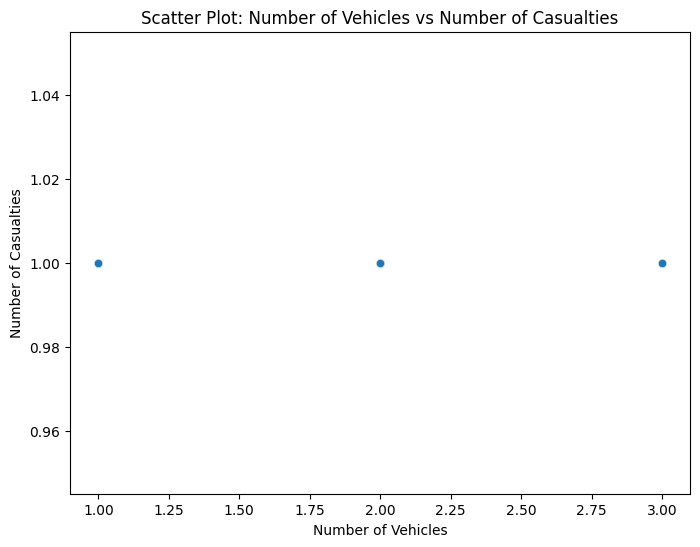

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=final_df, x="Number_of_Vehicles", y="Number_of_Casualties", alpha=0.6)
plt.title("Scatter Plot: Number of Vehicles vs Number of Casualties")
plt.xlabel("Number of Vehicles")
plt.ylabel("Number of Casualties")
plt.show()


In [60]:
# Get the updated column names after one-hot encoding
all_columns = final_df.columns

# Dynamically identify encoded columns
encoded_road_type = [col for col in all_columns if 'Road_Type' in col]
encoded_speed_limit = [col for col in all_columns if 'Speed_limit' in col]
encoded_light_conditions = [col for col in all_columns if 'Light_Conditions' in col]

# Print detected encoded columns
print("Encoded Road_Type Columns:", encoded_road_type)
print("Encoded Speed_Limit Columns:", encoded_speed_limit)
print("Encoded Light_Conditions Columns:", encoded_light_conditions)


Encoded Road_Type Columns: ['Road_Type_2', 'Road_Type_3', 'Road_Type_6', 'Road_Type_7', 'Road_Type_9']
Encoded Speed_Limit Columns: ['Speed_limit_30', 'Speed_limit_40', 'Speed_limit_50']
Encoded Light_Conditions Columns: ['Light_Conditions_4', 'Light_Conditions_5', 'Light_Conditions_6', 'Light_Conditions_7']


Correlation matrix

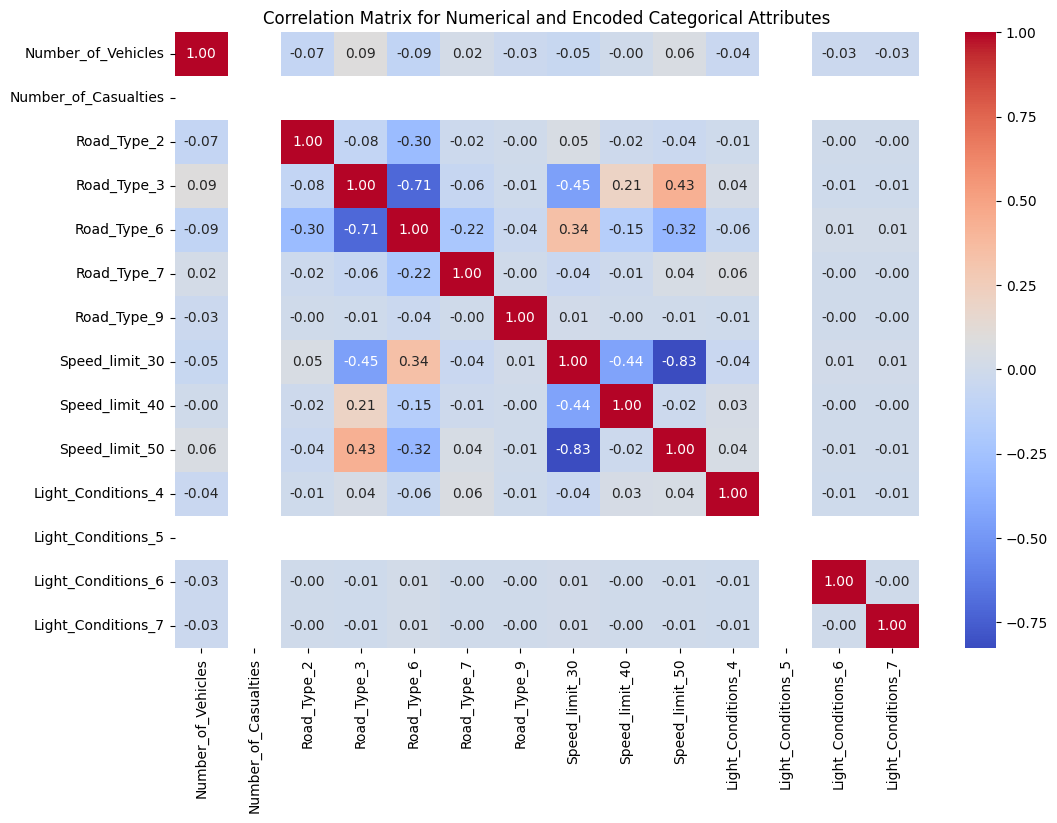

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns dynamically
numerical_columns = ['Number_of_Vehicles', 'Number_of_Casualties']
encoded_columns = encoded_road_type + encoded_speed_limit + encoded_light_conditions
relevant_columns = numerical_columns + encoded_columns

# Compute correlation matrix
correlation_matrix = final_df[relevant_columns].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Numerical and Encoded Categorical Attributes")
plt.show()


Heatmap

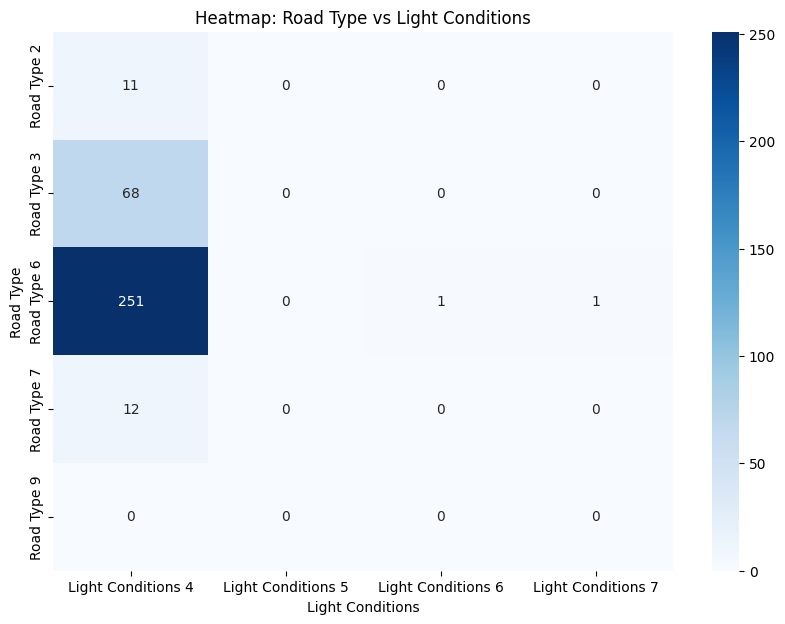

In [62]:
heatmap_data = pd.DataFrame()
# Sum the counts for each combination of Road_Type and Light_Conditions
for road in encoded_road_type:
    for light in encoded_light_conditions:
        heatmap_data.loc[road, light] = \
            final_df[(final_df[road] == 1) & (final_df[light] == 1)]["Number_of_Casualties"].count()

# Rename the index and column names for better readability
heatmap_data.index = [col.replace("Road_Type_", "Road Type ") for col in encoded_road_type]
heatmap_data.columns = [col.replace("Light_Conditions_", "Light Conditions ") \
                        for col in encoded_light_conditions]

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(heatmap_data, annot=True, cmap="Blues", fmt=".0f")
plt.title("Heatmap: Road Type vs Light Conditions")
plt.xlabel("Light Conditions")
plt.ylabel("Road Type")
plt.show()

### Task 2 - Descriptive

Cluster Summary:
   Cluster  Total_Casualties  Average_Casualties  Accident_Count
0        0               333                 1.0             333
1        1               582                 1.0             582
2        2               462                 1.0             462
3        3               149                 1.0             149
4        4               161                 1.0             161


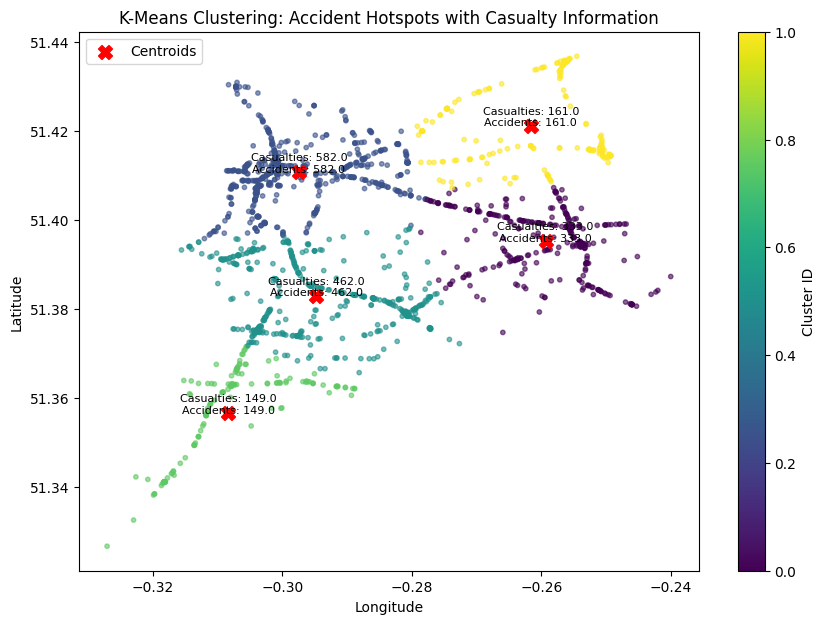

In [63]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Extract relevant columns for clustering
geo_data = final_df[['Longitude', 'Latitude', 'Number_of_Casualties']].dropna()

# Step 2: Apply K-Means Clustering with multiple initializations
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Run K-means 10 times for better results
geo_data['Cluster'] = kmeans.fit_predict(geo_data[['Longitude', 'Latitude']])

# Step 3: Aggregate Number of Casualties per Cluster
cluster_summary = geo_data.groupby('Cluster').agg(
    Total_Casualties=('Number_of_Casualties', 'sum'),
    Average_Casualties=('Number_of_Casualties', 'mean'),
    Accident_Count=('Cluster', 'count')
).reset_index()

# Display the summary of clusters
print("Cluster Summary:")
print(cluster_summary)

# Step 4: Plot Clustering Results with Casualty Information
plt.figure(figsize=(10, 7))
plt.scatter(geo_data['Longitude'], geo_data['Latitude'], c=geo_data['Cluster'], cmap='viridis', s=10, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=100, label='Centroids')

# Annotate clusters with total casualties
for i, row in cluster_summary.iterrows():
    plt.text(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1],
             f"Casualties: {row['Total_Casualties']}\nAccidents: {row['Accident_Count']}",
             color='black', fontsize=8, ha='center')

plt.title("K-Means Clustering: Accident Hotspots with Casualty Information")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label="Cluster ID")
plt.legend()
plt.show()

# lvl of severity


### Task 3 - Descriptive

In [64]:
# Define features (X) and target variable (y)
print(final_df.columns.tolist)

encoded_weather_conditions = [col for col in all_columns if 'Weather_Conditions' in col]
encoded_road_surface_conditions = [col for col in all_columns if 'Road_Surface_Conditions' in col]
encoded_speed_limit_conditions = [col for col in all_columns if 'Speed_limit' in col]
encoded_light_conditions = [col for col in all_columns if 'Light_Conditions' in col]

features = numerical_columns + encoded_road_type + encoded_speed_limit \
    + encoded_light_conditions + encoded_weather_conditions + encoded_road_surface_conditions

encoded_accident_severity_conditions = [col for col in all_columns if 'Accident_Severity' in col]

X = final_df[features]  # Predictor variables
y = final_df[encoded_accident_severity_conditions]  # Target variable

# Splitting the data into training, validation, and test sets
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, \
                                                random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)


<bound method IndexOpsMixin.tolist of Index(['Number_of_Casualties', 'Number_of_Vehicles', 'Latitude', 'Longitude',
       'Road_Type_2', 'Road_Type_3', 'Road_Type_6', 'Road_Type_7',
       'Road_Type_9', 'Speed_limit_30', 'Speed_limit_40', 'Speed_limit_50',
       'Light_Conditions_4', 'Light_Conditions_5', 'Light_Conditions_6',
       'Light_Conditions_7', 'Accident_Severity_2', 'Accident_Severity_3',
       'Weather_Conditions_2', 'Weather_Conditions_3', 'Weather_Conditions_4',
       'Weather_Conditions_5', 'Weather_Conditions_7', 'Weather_Conditions_8',
       'Weather_Conditions_9', 'Road_Surface_Conditions_2',
       'Road_Surface_Conditions_3', 'Road_Surface_Conditions_4',
       'Road_Surface_Conditions_5'],
      dtype='object')>
Training set: (1349, 25) (1349, 2)
Validation set: (169, 25) (169, 2)
Test set: (169, 25) (169, 2)


Validation Accuracy: 0.650887573964497

Classification Report on Validation Set:
                     precision    recall  f1-score   support

Accident_Severity_2       0.22      0.50      0.31        26
Accident_Severity_3       0.88      0.68      0.77       143

           accuracy                           0.65       169
          macro avg       0.55      0.59      0.54       169
       weighted avg       0.78      0.65      0.70       169



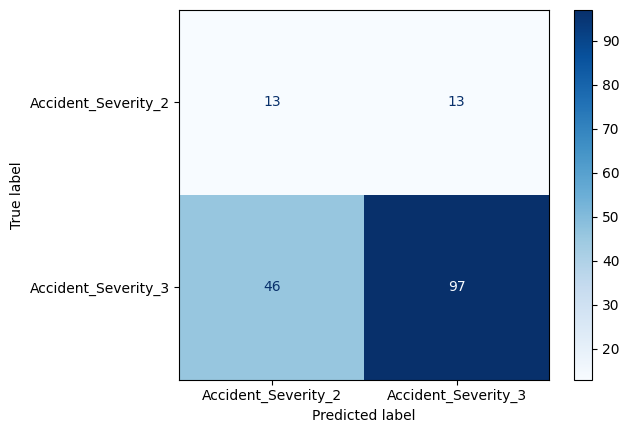

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.utils import class_weight

# Fix the Target Variable (Convert from one-hot encoding to a single column)
y_train_single = y_train.idxmax(axis=1)  # Convert one-hot target to single column
y_val_single = y_val.idxmax(axis=1)

# Handle class imbalance using class weights
weights = class_weight.compute_class_weight(
    class_weight="balanced", classes=y_train_single.unique(), y=y_train_single
)
class_weights = {cls: weight for cls, weight in zip(y_train_single.unique(), weights)}

# Initialize and train Decision Tree with class weights
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=42, class_weight=class_weights)
dt_model.fit(X_train, y_train_single)

# Predict on the validation set
y_pred_val = dt_model.predict(X_val)

# Evaluate the model
print("Validation Accuracy:", accuracy_score(y_val_single, y_pred_val))
print("\nClassification Report on Validation Set:")
print(classification_report(y_val_single, y_pred_val))

# Display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(dt_model, X_val, y_val_single, cmap="Blues")
